# Introduction to Sequential Data

- Dealing with Dates and Times in Python
- Time Series Manipulation
- Predictive Models 
- Filtering and Convolution
- ARIMA and Markov Models

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

### `datetime` objects

In [4]:
df = pd.read_html('https://finance.yahoo.com/quote/GE/history/')[0].iloc[:-1]

In [5]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 04, 2020",7.31,7.75,7.17,7.74,7.74,123076978
1,"Jun 03, 2020",7.22,7.42,7.18,7.36,7.36,122572800
2,"Jun 02, 2020",6.90,7.18,6.86,7.05,7.05,113575400
3,"Jun 01, 2020",6.58,6.82,6.49,6.76,6.76,75178700
4,"May 29, 2020",6.56,6.72,6.44,6.57,6.57,129404400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Date           100 non-null object
Open           100 non-null object
High           100 non-null object
Low            100 non-null object
Close*         100 non-null object
Adj Close**    100 non-null object
Volume         100 non-null object
dtypes: object(7)
memory usage: 5.6+ KB


### Convert to `datetime`

In [7]:
df['Date'] = pd.to_datetime(df.Date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Date           100 non-null datetime64[ns]
Open           100 non-null object
High           100 non-null object
Low            100 non-null object
Close*         100 non-null object
Adj Close**    100 non-null object
Volume         100 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 5.6+ KB


### Manipulate `datetime` objects

In [9]:
df['day'] = df.Date.dt.day

In [10]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,day
0,2020-06-04,7.31,7.75,7.17,7.74,7.74,123076978,4
1,2020-06-03,7.22,7.42,7.18,7.36,7.36,122572800,3
2,2020-06-02,6.90,7.18,6.86,7.05,7.05,113575400,2
3,2020-06-01,6.58,6.82,6.49,6.76,6.76,75178700,1
4,2020-05-29,6.56,6.72,6.44,6.57,6.57,129404400,29


In [11]:
df.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume,day
95,2020-01-21,11.74,11.80,11.61,11.66,11.65,43738200,21
96,2020-01-17,11.85,11.93,11.76,11.81,11.80,46580700,17
97,2020-01-16,11.94,11.98,11.82,11.84,11.83,36673600,16
98,2020-01-15,12.02,12.02,11.83,11.87,11.86,46051000,15
99,2020-01-14,12.16,12.19,11.99,12.03,12.02,45030000,14


### Index `DataFrame`

In [12]:
df.set_index('Date', inplace = True)
df['Adj Close**']# = df['Adj Close**'].astype('float')
df = df.loc[df['Adj Close**'] != '0.01 Dividend'].astype('float')

In [13]:
df.head()

,Open,High,Low,Close*,Adj Close**,Volume,day
Date,,,,,,,
2020-06-04,7.31,7.75,7.17,7.74,7.74,123076978.0,4.0
2020-06-03,7.22,7.42,7.18,7.36,7.36,122572800.0,3.0
2020-06-02,6.90,7.18,6.86,7.05,7.05,113575400.0,2.0
2020-06-01,6.58,6.82,6.49,6.76,6.76,75178700.0,1.0
2020-05-29,6.56,6.72,6.44,6.57,6.57,129404400.0,29.0


### Plotting

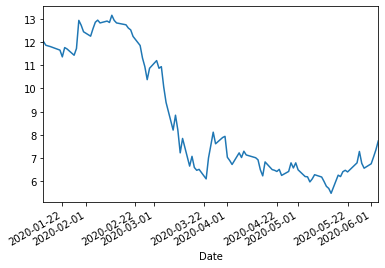

In [14]:
df['Adj Close**'].plot()

### Rolling Statistics

- Moving Average contains a **window** over which we compute the average.  

In [18]:
df['Adj Close**'].rolling(5).mean()

Date
2020-06-04       NaN
2020-06-03       NaN
2020-06-02       NaN
2020-06-01       NaN
2020-05-29     7.096
               ...  
2020-01-21    11.580
2020-01-17    11.654
2020-01-16    11.680
2020-01-15    11.700
2020-01-14    11.832
Name: Adj Close**, Length: 99, dtype: float64

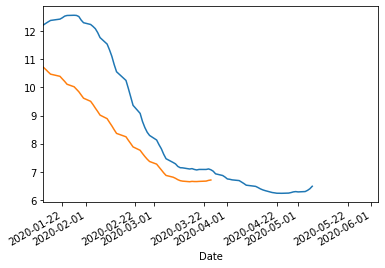

In [19]:
df['Adj Close**'].rolling(20).mean().plot()
df['Adj Close**'].rolling(50).mean().plot()

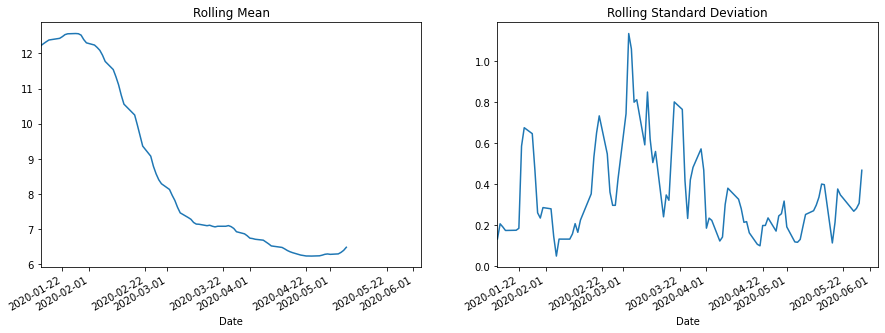

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
df['Adj Close**'].rolling(20).mean().plot(title = 'Rolling Mean', ax = ax[0])
df['Adj Close**'].rolling(5).std().plot(title = 'Rolling Standard Deviation', ax = ax[1])

## Standard Descriptive Analysis

- `autocorrelation`
- `differencing`
- `seasonality`


In [23]:
df['Adj Close**'].diff()

Date
2020-06-04     NaN
2020-06-03   -0.38
2020-06-02   -0.31
2020-06-01   -0.29
2020-05-29   -0.19
              ... 
2020-01-21    0.29
2020-01-17    0.15
2020-01-16    0.03
2020-01-15    0.03
2020-01-14    0.16
Name: Adj Close**, Length: 99, dtype: float64

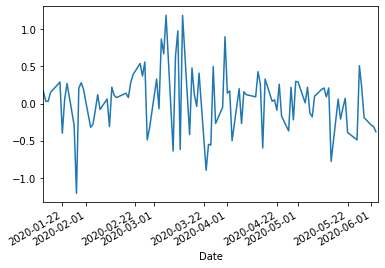

In [24]:
df['Adj Close**'].diff().plot()

In [25]:
df.rename(columns = {'Adj Close**': 'adj_close'}, inplace=True)

### Autocorrelation

In [26]:
from pandas.plotting import autocorrelation_plot

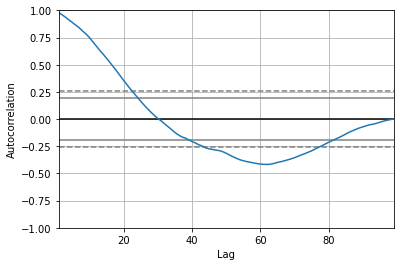

In [28]:
autocorrelation_plot(df.adj_close)

In [29]:
import statsmodels.api as sm

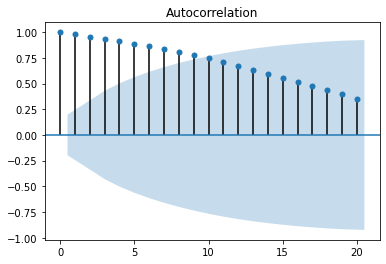

In [31]:
sm.graphics.tsa.plot_acf(df.adj_close);

In [37]:
orig = df['adj_close']#.shift(1)
day_before = df['adj_close'].shift(-1)

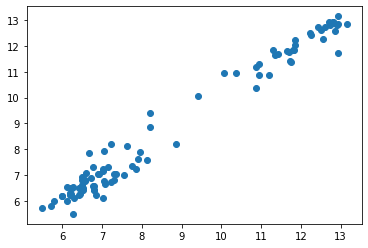

In [38]:
plt.scatter(orig, day_before)

### Stationarity: Important Assumption for Classic Models

*In mathematics and statistics, a stationary process (or a strict/strictly stationary process or strong/strongly stationary process) is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.*

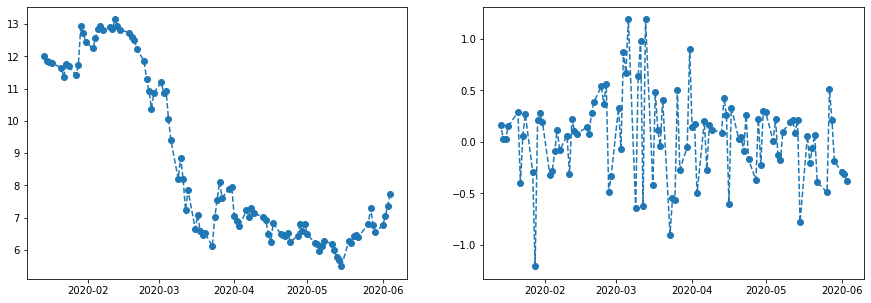

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(df.adj_close, '--o')
ax[1].plot(df.adj_close.diff().dropna(), '--o');

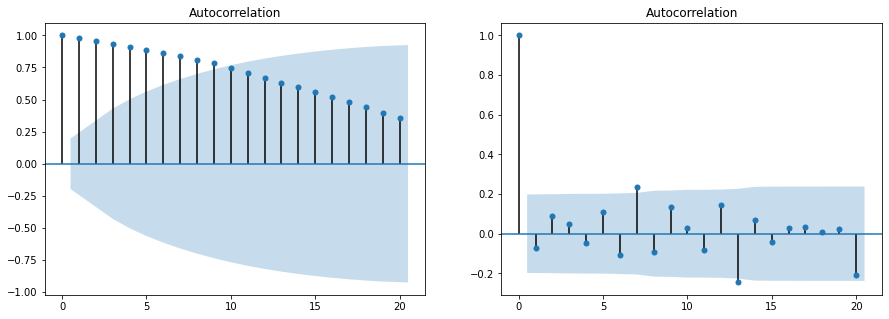

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sm.graphics.tsa.plot_acf(df.adj_close, ax = ax[0])
sm.graphics.tsa.plot_acf(df.adj_close.diff().dropna(), ax = ax[1]);

### Is it stationary?

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
adfuller(df['adj_close'])[1]

0.9232859955142797

In [45]:
adfuller(df['adj_close'].diff(1).dropna())[1]

9.816185188545954e-19

### Autoregression

$$X_{t}=c+\varphi X_{{t-1}}+\varepsilon _{t}$$

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import 93 as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [47]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

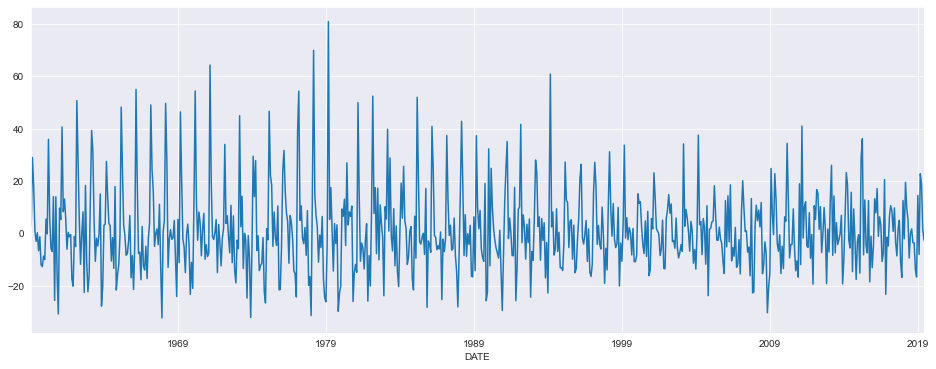

In [48]:
data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq('MS')
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [49]:
mod = AutoReg(housing, 3)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Thu, 04 Jun 2020   AIC                              5.468
Time:                        20:41:38   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [57]:
sel = ar_select_order(housing, 25)
sel.ar_lags
res = sel.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(24)   Log Likelihood               -2588.520
Method:               Conditional MLE   S.D. of innovations              9.715
Date:                Thu, 04 Jun 2020   AIC                              4.622
Time:                        20:49:32   BIC                              4.790
Sample:                    02-01-1961   HQIC                             4.687
                         - 06-01-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.5130      0.476      3.176      0.001       0.579       2.447
HOUSTNSA.L1     -0.3121      0.037     -8.500      0.000      -0.384      -0.240
HOUSTNSA.L2     -0.1216      0.038     -3.167      0.002      -0.197      -0.046
HOUSTNSA.L3      0.0025      0.039      0.064      0.949      -0.073       0.078
HOUSTNSA.L4     -0.0305      0.039     -0.791      0.429      -0.106       0.045
HOUSTNSA.L5      0.0102      0.038      0.266      0.790      -0.065       0.085
HOUSTNSA.L6     -0.0438      0.038     -1.142      0.253      -0.119       0.031
HOUSTNSA.L7     -0.0471      0.038     -1.231      0.218      -0.122       0.028
HOUSTNSA.L8     -0.0808      0.038     -2.109      0.035      -0.156      -0.006
HOUSTNSA.L9     -0.0442      0.038     -1.167      0.243      -0.119       0.030
HOUSTNSA.L10    -0.1300      0.038     -3.435      0.001      -0.204      -0.056
HOUSTNSA.L11     0.0224      0.038      0.590      0.555      -0.052       0.097
HOUSTNSA.L12     0.3743      0.036     10.273      0.000       0.303       0.446
HOUSTNSA.L13     0.2721      0.037      7.442      0.000       0.200       0.344
HOUSTNSA.L14     0.0571      0.038      1.505      0.132      -0.017       0.132
HOUSTNSA.L15    -0.0656      0.038     -1.740      0.082      -0.140       0.008
HOUSTNSA.L16    -0.1683      0.038     -4.459      0.000      -0.242      -0.094
HOUSTNSA.L17    -0.0527      0.038     -1.380      0.168      -0.127       0.022
HOUSTNSA.L18    -0.0823      0.038     -2.157      0.031      -0.157      -0.008
HOUSTNSA.L19     0.0121      0.038      0.315      0.752      -0.063       0.087
HOUSTNSA.L20    -0.0796      0.038     -2.080      0.038      -0.155      -0.005
HOUSTNSA.L21    -0.0776      0.038     -2.025      0.043      -0.153      -0.002
HOUSTNSA.L22     0.0101      0.038      0.264      0.792      -0.065       0.085
HOUSTNSA.L23     0.0699      0.038      1.832      0.067      -0.005       0.145
HOUSTNSA.L24     0.2320      0.036      6.381      0.000       0.161       0.303
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0944           -0.0000j            1.0944           -0.5000
AR.2            -1.0287           -0.2557j            1.0600           -0.4612
AR.3            -1.0287           +0.2557j            1.0600            0.4612
AR.4            -0.8888           -0.5122j            1.0258           -0.4168
AR.5            -0.8888           +0.5122j            1.0258            0.4168
AR.6            -0.7595           -0.7729j            1.0836           -0.3736
AR.7            -0.7595           +0.7729j            1.0836            0.3736
AR.8            -0.5357           -0.8995j            1.0469           -0.3355
AR.9            -0.5357  

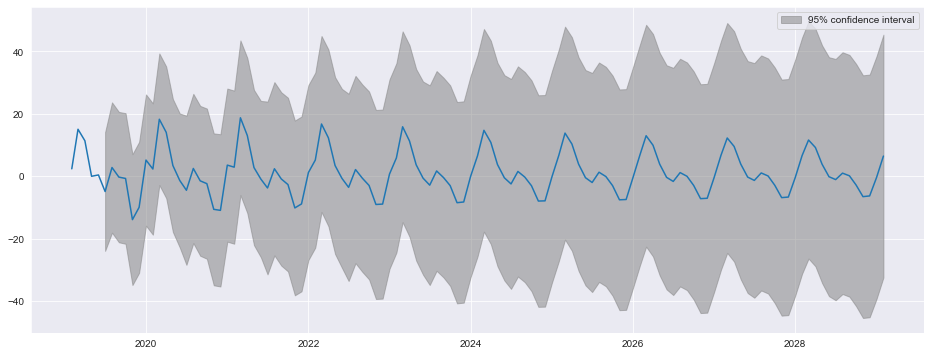

In [58]:
fig = res.plot_predict(720, 840)

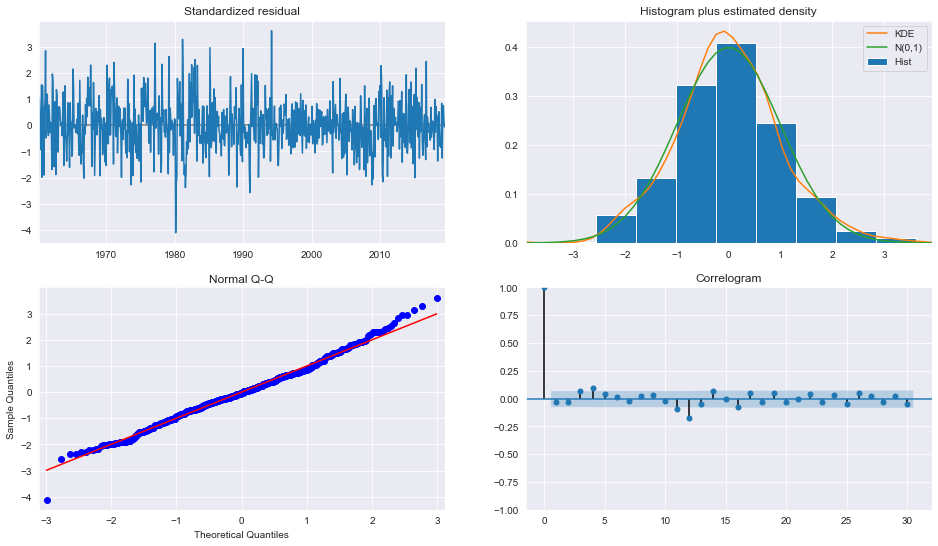

In [52]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

### Seasonal Dummies

In [53]:
sel = ar_select_order(housing, 13, seasonal=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Thu, 04 Jun 2020   AIC                              4.541
Time:                        20:46:54   BIC                              4.636
Sample:                    04-01-1959   HQIC                             4.578
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.2726      1.373      0.927      0.354      -1.418       3.963
seasonal.1     32.6477      1.824     17.901      0.000      29.073      36.222
seasonal.2     23.0685      2.435      9.472    

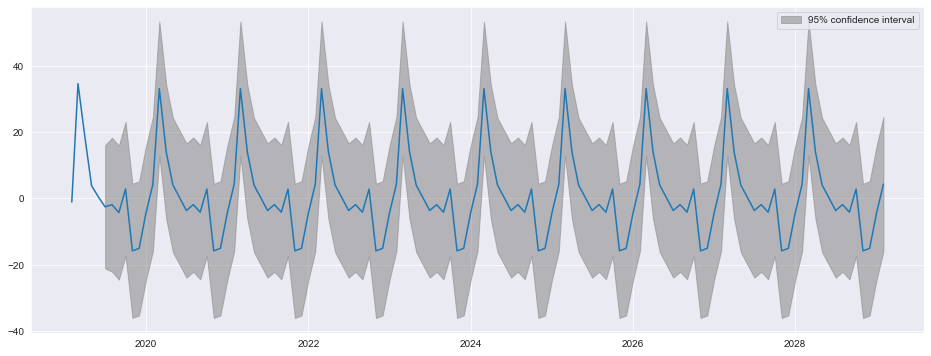

In [54]:
fig = res.plot_predict(720, 840)

### ARIMA Model

---------

**A**uto **R**egressive **I**ntegrated **M**oving **A**verage



> *The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past. The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible*. -- [Wikipedia](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

### ARIMA Model Parameters

```
order(p, d, q)
```

- d: Augmented Dicky Fuller determines amount of differencing

- p: The lag beyond which the PACF cuts off is the indicated number of AR terms.

- q: The lag beyond which the ACF cuts off is the indicated number of MA terms.

### `statsmodels`

In [59]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [60]:
data = sm.datasets.co2.load_pandas()
y = data.data

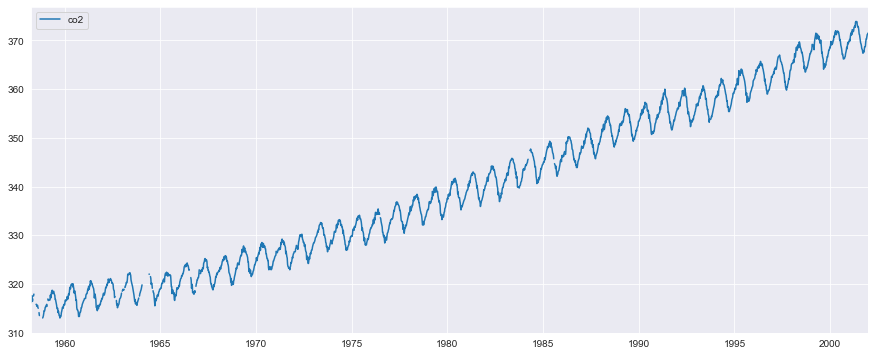

In [61]:
y.plot(figsize=(15, 6))

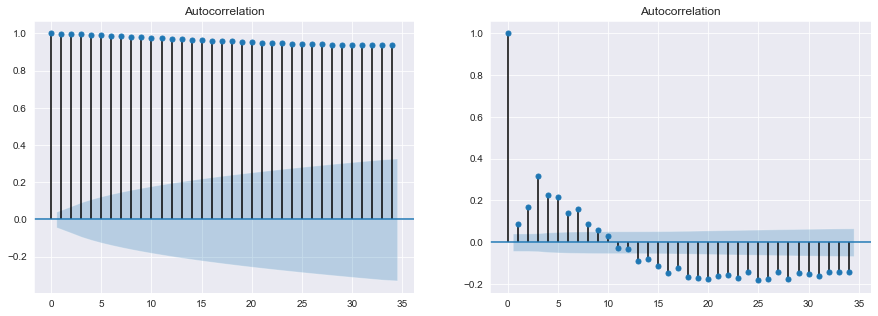

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
plot_acf(data.data['co2'].dropna(), ax = ax[0]);
plot_acf(data.data['co2'].diff(1).dropna(), ax = ax[1]);

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
# #get rid of nan's
y = y.fillna(y.bfill())
#instantiate ARIMA model
arima = ARIMA(y, (0, 1, 2))

In [65]:
res = arima.fit()

In [66]:
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.co2   No. Observations:                 2283
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1615.372
Method:                       css-mle   S.D. of innovations              0.491
Date:                Thu, 04 Jun 2020   AIC                           3238.745
Time:                        20:54:21   BIC                           3261.678
Sample:                    04-05-1958   HQIC                          3247.109
                         - 12-29-2001                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0244      0.012      2.102      0.036       0.002       0.047
ma.L1.D.co2     0.0138      0.023      0.589      0.556      -0.032       0.060
ma.L2.D.co2     0.1144      0.020      5.806    

In [67]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
count = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            count += 1
            if count % 5 == 0:
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11275.275426220167
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26704.855615498556
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8635.931547669352
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3299.575166901089
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:3266.3036785589734
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3227.3031652103573
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4861.052217685146
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:3289.1883384826497
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3232.9912865752303
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3231.1677420782535
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4288.828647507544
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3098.131050344374


In [69]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8963      0.023     38.330      0.000       0.850       0.942
ma.L1         -1.3195      0.060    -21.901      0.000      -1.438      -1.201
ar.S.L12      -0.0301      0.023     -1.306      0.192      -0.075       0.015
ma.S.L12      -1.0000      7.662     -0.131      0.896     -16.017      14.017
sigma2         0.1275      0.977      0.130      0.896      -1.788       2.042


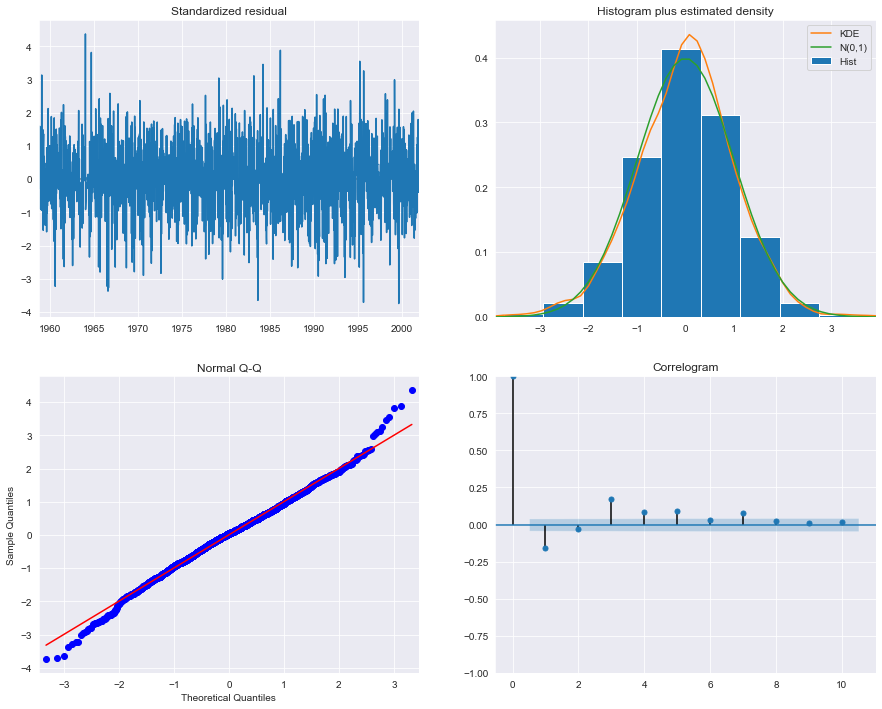

In [70]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [72]:
pred = results.get_prediction(start = 2000,dynamic=False)
pred_ci = pred.conf_int()

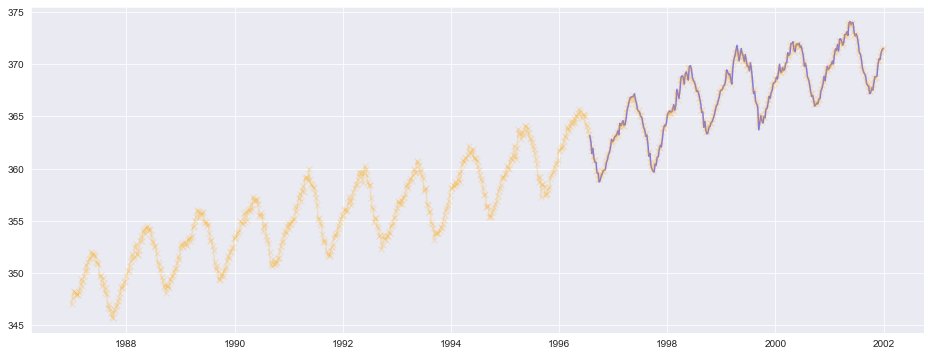

In [73]:
plt.plot(pred.predicted_mean, color = 'blue', alpha = 0.5)
plt.plot(y[1500:], '-x', color = 'orange', alpha = 0.2)

### Evaluating Results

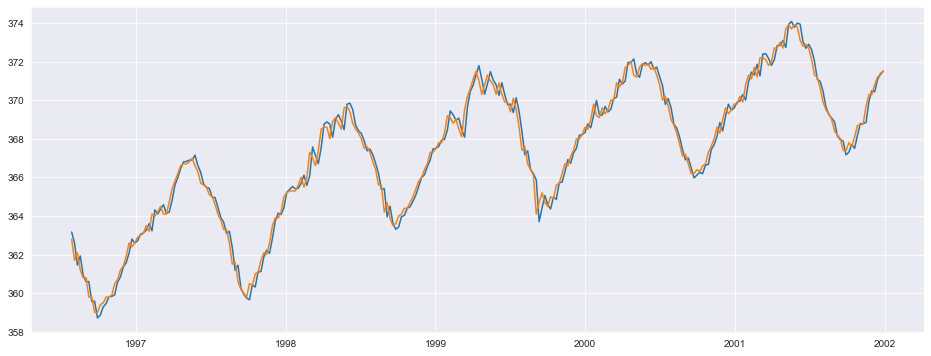

In [74]:
plt.plot(pred.predicted_mean)
plt.plot(y[2000:])

In [75]:
y_forecasted = pred.predicted_mean.to_frame()
y_truth = y.iloc[2000:]

In [76]:
y_truth.head()

,co2
1996-07-27,362.8
1996-08-03,361.7
1996-08-10,362.1
1996-08-17,361.2
1996-08-24,360.8


In [77]:
y_forecasted.head()

,0
1996-07-27,363.168245
1996-08-03,362.601110
1996-08-10,361.451369
1996-08-17,361.929781
1996-08-24,360.942581


In [78]:
y_truth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1996-07-27 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
co2    284 non-null float64
dtypes: float64(1)
memory usage: 4.4 KB


In [79]:
y_forecasted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1996-07-27 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
0    284 non-null float64
dtypes: float64(1)
memory usage: 4.4 KB


In [81]:
((y_truth.values - y_forecasted.values)**2).mean()

0.21318961158221378

### Smoothing 

In [82]:
df = pd.read_csv('data/air_passengers.csv', index_col=0)

In [83]:
df.head()

,x
1,112
2,118
3,132
4,129
5,121


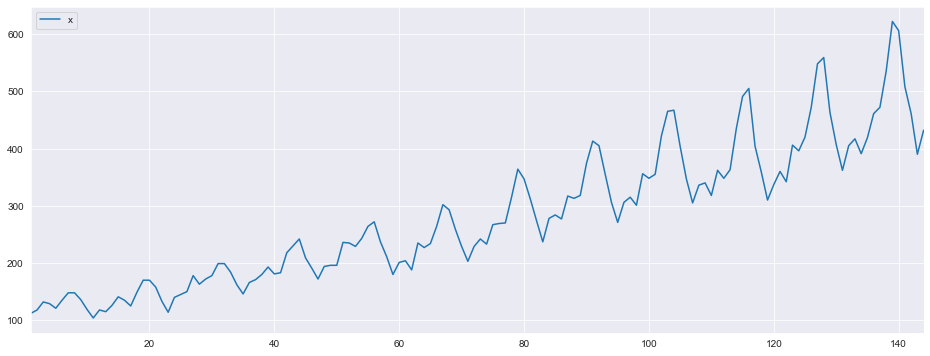

In [84]:
df.plot()

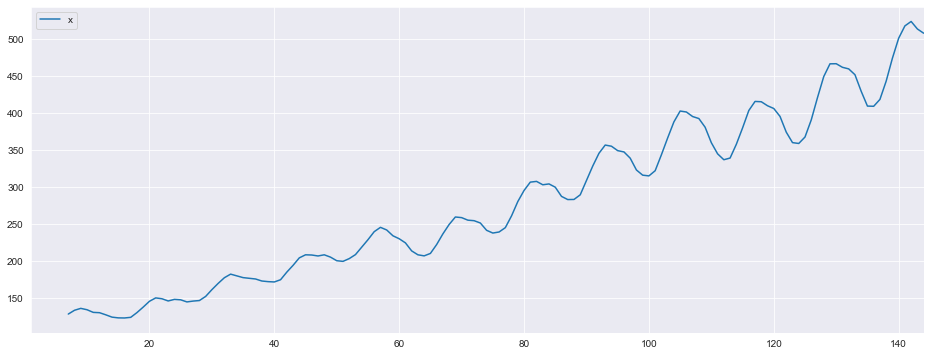

In [85]:
#rolling average
df.rolling(7).mean().plot()

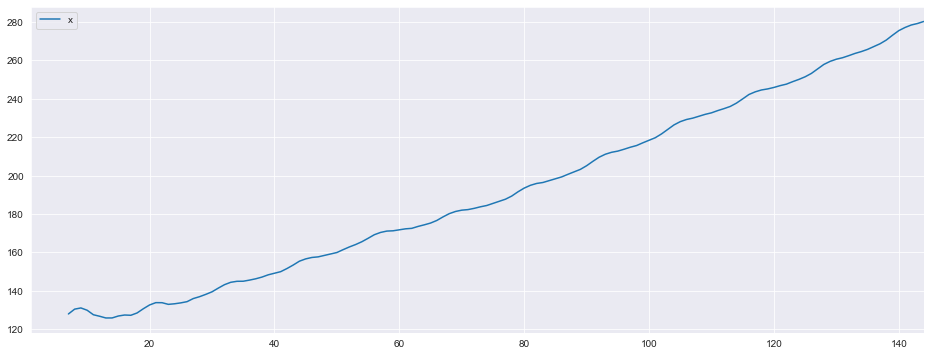

In [86]:
#expanding mean
df.expanding(7).mean().plot()

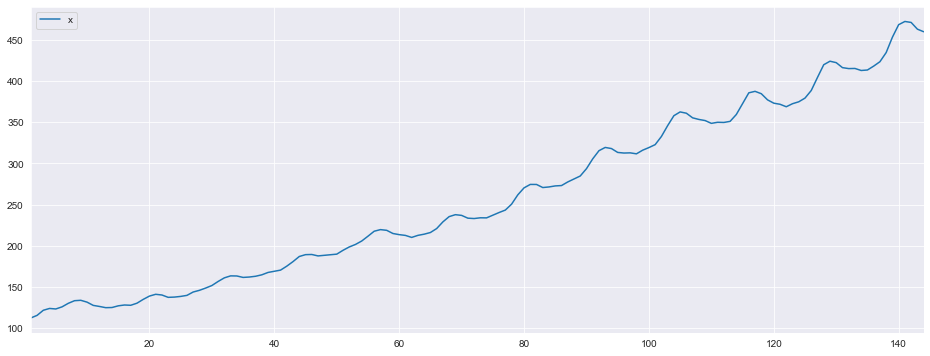

In [87]:
#exponentially weighted
df.ewm(alpha = 0.1).mean().plot()

### Triple Exponential Smoothing

Some rules of thumb:

- Single Exponential smoothing with no trend or seasonality. 


$$s_i = \alpha x_i + (1 - \alpha)s_{i - 1}$$
$$\vdots$$

$$ = \alpha \sum_{j = 0}^i (1 - \alpha)^j x_{i - j}$$

$$x_{i + h} = s_i $$

-------

- Double for trend but no seasonality. 

$$s_i = \alpha x_i + ( 1 - \alpha)(s_{i - 1} + t_{i - 1})$$

$$t_i = \beta(s_i = s_{i - 1}) + (1 - \beta)t_{i - 1}$$

$$x_{t + h} = s_i + ht_i + p_{i - k + h}$$

---------


- Triple for trend and seasonality -- *Holt-Winters Method*


$$s_i = \alpha(x_i - p_{i-k}) + (1 - \alpha)(s_{i - 1} + t_{i - 1})$$

$$t_i = \beta(s_i - s_{i - 1}) + (1 - \beta)t_{i - 1}$$

$$p_i = \gamma \frac{x_i}{s_i} + (1 - \gamma)p_{i - k}$$

$$x_{i + h} = (s_i + ht_i)p_{i - k + h}$$

In [88]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = df['x'].iloc[:130]
test = df['x'].iloc[130:]
holt = ExponentialSmoothing(np.asarray(train), seasonal = 'mul', seasonal_periods = 12).fit()
predict = holt.predict(start = test.index[0], end = test.index[-1])

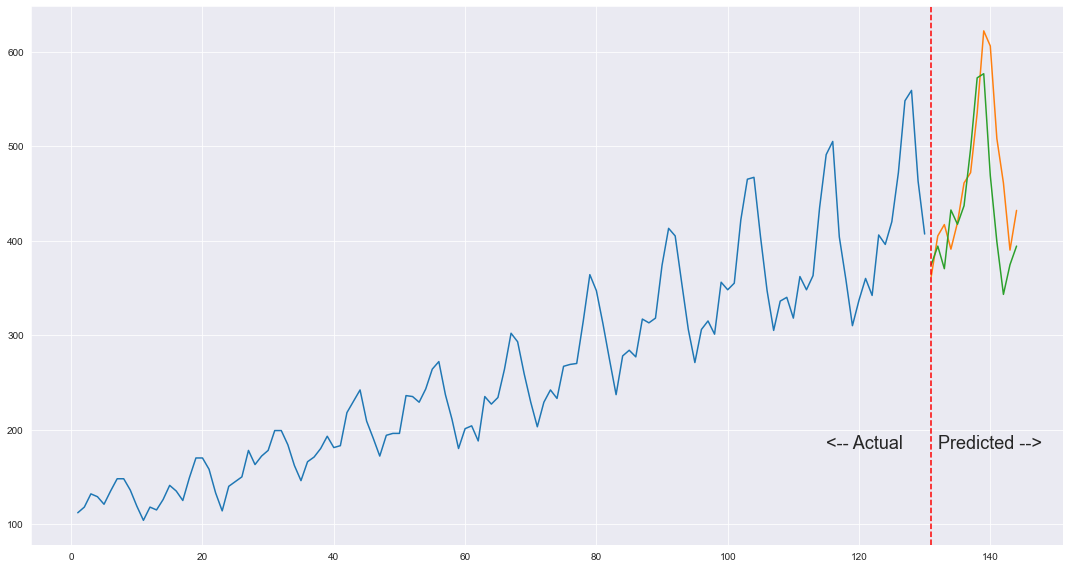

In [89]:
plt.figure(figsize = (15, 8))
plt.plot(train.index, train, label = 'train')
plt.plot(test.index, test, label = 'test')
plt.plot(test.index, predict, label = 'predict')
plt.axvline( test.index[0], color = 'red', linestyle = '--')
plt.text(test.index[0]-16, 180, '<-- Actual', fontsize = 18)
plt.text(test.index[0] + 1, 180, 'Predicted -->', fontsize = 18)
plt.tight_layout()

## Kalman Filter

The code below was derived from the article *Implementation of Kalman Filter with Python Language* found [here](https://arxiv.org/pdf/1204.0375.pdf).  Here is a resource from **MATLAB** on Kalman Filters as well: 

https://www.mathworks.com/videos/understanding-kalman-filters-part-1-why-use-kalman-filters--1485813028675.html

Similar to lectures, we have relationships where we try to estimate a state of $x \in R^n$ with a measurement $y \in R^m$.

$$x_t = Ax_{k-1} + Bu_k + w_{k-1}$$

and 

$$y_k = Hx_k + v_k$$

- $w_k$ and $v_k$ are process and measurement of noise, independent, gaussian

$$p(w) = N(0, Q)$$
$$p(v) = N(0, R)$$

- A relates state at previous time step to current.

- B relates control input $u$ to the state $x$

### Prediction Step

$$X_k = A_{k-1}X_{k-1} + B_k U_k$$
$$P_k = A_{k-1}P_{k-1}A^T_{k-1} + Q_{k-1}$$

• $X_k$ and  $P_k$ are the predicted mean and covariance of the state, respectively, on the
time step k before seeing the measurement.

• $X_k$ and $P_k$ are the estimated mean and covariance of the state, respectively, on time step $k$ after seeing the measurement. 

### Update Step

$$V_k = Y_k - H_kX_k^-$$


$$S_k = H_kP_k^-H^T_k + R_k$$


$$K_k = P_k^-H_k^TS_k^{-1}$$

$$X_k = X_k^- + K_kV_k$$

$$P_k = P_k^- - K_kS_kK^T_k$$

- $Y_k$ is mean of the measurement on time step k .
- $V_k$ is the innovation or the measurement residual on time step k .
- $S_k$ is the measurement prediction covariance on the time step k .
- $K_k$ is the filter gain, which tells how much the predictions should be corrected on time step k .

### Python implementation

- X : The mean state estimate of the previous step ( k −1).
- P : The state covariance of previous step ( k −1).
- A : The transition n n × matrix.
- Q : The process noise covariance matrix.
- B : The input effect matrix.
- U : The control input. 

In [90]:
def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U)
    P = np.dot(A, np.dot(P, A.T)) + Q
    return (X, P)

In [91]:
def kf_update(X, P, Y, H, R):
    IM = np.dot(H, X)
    IS = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(P, np.dot(H.T, np.linalg.inv(IS)))
    X = X + np.dot(K, (Y-IM))
    P = P - np.dot(K, np.dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH) 

In [92]:
 def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - np.tile(M, X.shape[1])
        E = 0.5 * np.sum(DX * (np.dot(np.linalg.inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    elif X.shape[1] == 1:
        DX = np.tile(X, M.shape[1])- M
        E = 0.5 * np.sum(DX * (np.dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = np.exp(-E)
    else:
        DX = X-M
        E = 0.5 * np.dot(DX.T, np.dot(np.linalg.inv(S), DX))
        E = E + 0.5 * M.shape[0] * np.log(2 * np.pi) + 0.5 * np.log(np.linalg.det(S))
        P = exp(-E)
    return (P[0],E[0])

In [93]:
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = np.array([[0.0], [0.0], [0.1], [0.1]])
P = np.diag((0.01, 0.01, 0.01, 0.01))
A = np.array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,\
 1]])
Q = np.eye(X.shape[0])
B = np.eye(X.shape[0])
U = np.zeros((X.shape[0],1))

In [94]:
# Measurement matrices
Y = np.array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] +\
 abs(np.random.randn(1)[0])]])
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = np.eye(Y.shape[0]) 

In [95]:
# Number of iterations in Kalman Filter
N_iter = 50
x = []
y = []
y2 = []
# Applying the Kalman Filter
for i in np.arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = np.array([[X[0,0] + abs(0.1 * np.random.randn(1)[0])],[X[1, 0] +\
    abs(0.1 * np.random.randn(1)[0])]]) 
    x.append(X[0,0])
    y.append(Y[0])

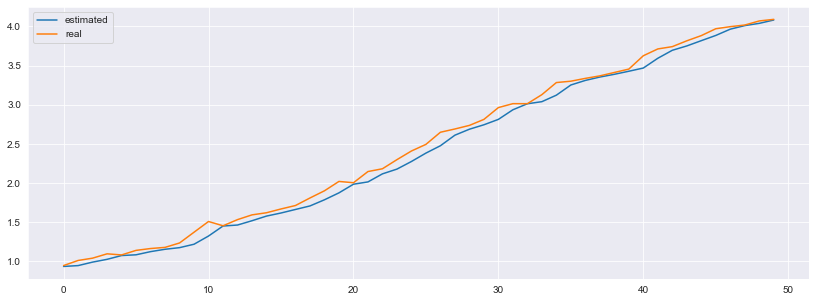

In [96]:
plt.figure(figsize = (14, 5))
plt.plot(x, label = 'estimated')
plt.plot(y, label = 'real')
plt.legend()

### Markov Models

The first example models the federal funds rate as noise around a constant intercept, but where the intercept changes during different regimes. The model is simply:

$$r_t = \mu_{S_t} + \epsilon_t \quad \epsilon_t \approx N(0, \sigma^2)$$

where $S_t \in {0, 1}$, and regime transitions according to 

$$ P(S_t = s_t | S_{t - 1} = s_{t-1}) = \begin{bmatrix} p_{00} & p_{10} \\ 1-p_{00} & 1 - p_{10} \end{bmatrix} $$

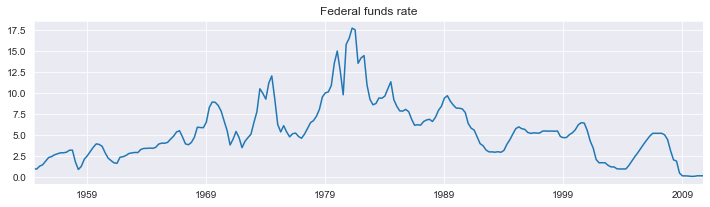

In [97]:
# Get the federal funds rate data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds
dta_fedfunds = pd.Series(fedfunds, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))

# Plot the data
dta_fedfunds.plot(title='Federal funds rate', figsize=(12,3))

In [98]:
# Fit the model
# (a switching mean is the default of the MarkovRegession model)
mod_fedfunds = sm.tsa.MarkovRegression(dta_fedfunds, k_regimes=2)
res_fedfunds = mod_fedfunds.fit()

In [100]:
res_fedfunds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               MarkovRegression   Log Likelihood                -508.636
Date:                Thu, 04 Jun 2020   AIC                           1027.272
Time:                        21:02:49   BIC                           1044.375
Sample:                    07-01-1954   HQIC                          1034.174
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7088      0.177     20.988      0.000       3.362       4.055
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5568      0.300     31.857      0.000       8.969      10.145
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.4418      0.425     10.447      0.000       3.608       5.275
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9821      0.010     94.443      0.000       0.962       1.002
p[1->0]        0.0504      0.027      1.876      0.061      -0.002       0.103
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

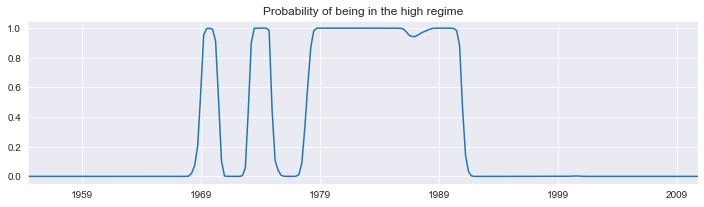

In [103]:
res_fedfunds.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,3));
#(dta_fedfunds).plot(title='Federal funds rate', figsize=(12,3))

In [104]:
print(res_fedfunds.expected_durations)

[55.85400626 19.85506546]


Including a lagged dependent variable.

$$r_t = \mu_{S_t} + r_{t - 1}\beta_{S_t} + \epsilon_t $$

In [105]:
# Fit the model
mod_fedfunds2 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[1:], k_regimes=2, exog=dta_fedfunds.iloc[:-1])
res_fedfunds2 = mod_fedfunds2.fit()

In [106]:
print(res_fedfunds2.summary())

                        Markov Switching Model Results                        
Dep. Variable:                      y   No. Observations:                  225
Model:               MarkovRegression   Log Likelihood                -264.711
Date:                Thu, 04 Jun 2020   AIC                            543.421
Time:                        21:05:27   BIC                            567.334
Sample:                    10-01-1954   HQIC                           553.073
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7245      0.289      2.510      0.012       0.159       1.290
x1             0.7631      0.034     22.629      0.0

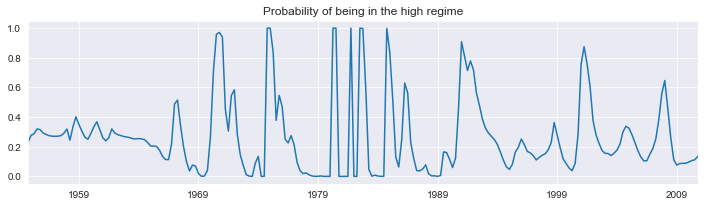

In [107]:
res_fedfunds2.smoothed_marginal_probabilities[0].plot(
    title='Probability of being in the high regime', figsize=(12,3));

In [108]:
print(res_fedfunds2.expected_durations)

[2.76105188 7.65529154]


##### Exogenous Variables and 2 or 3 regimes



In [109]:
# Get the additional data
from statsmodels.tsa.regime_switching.tests.test_markov_regression import ogap, inf
dta_ogap = pd.Series(ogap, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))
dta_inf = pd.Series(inf, index=pd.date_range('1954-07-01', '2010-10-01', freq='QS'))

exog = pd.concat((dta_fedfunds.shift(), dta_ogap, dta_inf), axis=1).iloc[4:]

# Fit the 2-regime model
mod_fedfunds3 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[4:], k_regimes=2, exog=exog)
res_fedfunds3 = mod_fedfunds3.fit()

In [110]:
res_fedfunds3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                -229.256
Date:                Thu, 04 Jun 2020   AIC                            480.512
Time:                        21:06:20   BIC                            517.942
Sample:                    07-01-1955   HQIC                           495.624
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6555      0.137      4.771      0.000       0.386       0.925
x1             0.8314      0.033     24.951      0.000       0.766       0.897
x2             0.1355      0.029      4.609      0.000       0.078       0.193
x3            -0.0274      0.041     -0.671      0.502      -0.107       0.053
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0945      0.128     -0.739      0.460      -0.345       0.156
x1             0.9293      0.027     34.309      0.000       0.876       0.982
x2             0.0343      0.024      1.429      0.153      -0.013       0.081
x3             0.2125      0.030      7.147      0.000       0.154       0.271
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3323      0.035      9.526      0.000       0.264       0.401
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7279      0.093      7.828      0.000       0.546       0.910
p[1->0]        0.2115      0.064      3.298      0.001       0.086       0.337
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [111]:
# Fit the 3-regime model
np.random.seed(12345)
mod_fedfunds4 = sm.tsa.MarkovRegression(
    dta_fedfunds.iloc[4:], k_regimes=3, exog=exog)
res_fedfunds4 = mod_fedfunds4.fit(search_reps=20)

In [112]:
res_fedfunds4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               MarkovRegression   Log Likelihood                -180.806
Date:                Thu, 04 Jun 2020   AIC                            399.611
Time:                        21:06:35   BIC                            464.262
Sample:                    07-01-1955   HQIC                           425.713
                         - 10-01-2010                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0250      0.290     -3.531      0.000      -1.594      -0.456
x1             0.3277      0.086      3.812      0.000       0.159       0.496
x2             0.2036      0.049      4.152      0.000       0.107       0.300
x3             1.1381      0.081     13.977      0.000       0.978       1.298
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0259      0.087     -0.298      0.765      -0.196       0.144
x1             0.9737      0.019     50.265      0.000       0.936       1.012
x2             0.0341      0.017      2.030      0.042       0.001       0.067
x3             0.1215      0.022      5.606      0.000       0.079       0.164
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7346      0.130      5.632      0.000       0.479       0.990
x1             0.8436      0.024     35.198      0.000       0.797       0.891
x2             0.1633      0.025      6.515      0.000       0.114       0.212
x3            -0.0499      0.027     -1.835      0.067      -0.103       0.003
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1660      0.018      9.240      0.000       0.131       0.201
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7214      0.117      6.177      0.000       0.493       0.950
p[1->0]     4.001e-08        nan        nan        nan         nan         nan
p[2->0]        0.0783      0.038      2.079      0.038       0.004       0.152
p[0->1]        0.1044      0.095      1.103      0.270      -0.081       0.290
p[1->1]        0.8259      0.054     15.208      0.000       0.719       0.932
p[2->1]        0.2288      0.073      3.150      0.002       0.086       0.371
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differ

##### Plot the 3-state model

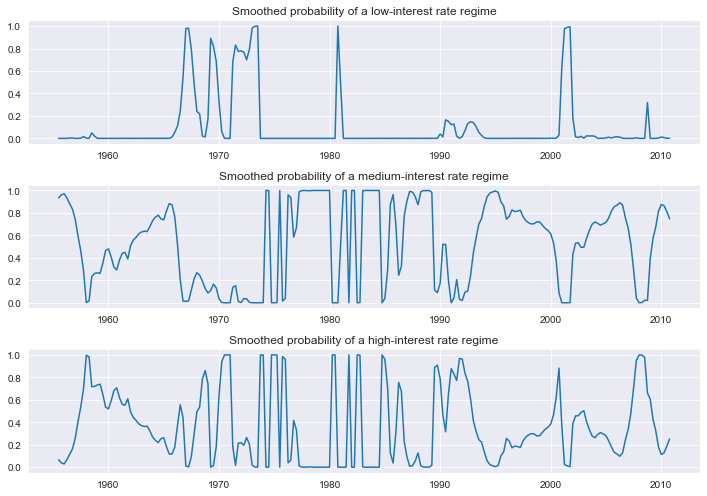

In [113]:
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-interest rate regime')

ax = axes[1]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-interest rate regime')

ax = axes[2]
ax.plot(res_fedfunds4.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-interest rate regime')

fig.tight_layout()

### HMM in Python: Viterbi 

<img src = https://upload.wikimedia.org/wikipedia/commons/0/0c/An_example_of_HMM.png />

In [ ]:
obs = ('normal', 'cold', 'dizzy')
states = ('Healthy', 'Fever')
start_p = {'Healthy': 0.6, 'Fever': 0.4}
trans_p = {
   'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
   'Fever' : {'Healthy': 0.4, 'Fever': 0.6}
   }
emit_p = {
   'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
   'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}
   }

In [ ]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)):
        V.append({})
        for st in states:
            max_tr_prob = V[t-1][states[0]]["prob"]*trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t-1][prev_st]["prob"]*trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                    
            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
                    
    for line in dptable(V):
        print (line)
    
    opt = []
    max_prob = 0.0
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st
    
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print ('The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob)

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)

In [ ]:
viterbi(obs, states, start_p, trans_p, emit_p)

### HMMLearn

In [ ]:
import hmmlearn
from hmmlearn.hmm import GaussianHMM

In [ ]:
train = train.values.reshape(-1,1)
n_states = 2
model = GaussianHMM(n_components = 2, n_iter = 100).fit(train)

In [ ]:
hidden_states = model.predict(train)

In [ ]:
model.means_

In [ ]:
model.covars_

In [ ]:
np.bincount(hidden_states)

In [ ]:
model = GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

In [ ]:
model.fit(X)

In [ ]:
model.predict(Z.reshape(-1,1))

In [114]:
import scipy.stats as stats

In [125]:
x1 = np.random.normal(size = 1000)
x2 = np.random.normal(loc = 1, size = 1000)
x3 = np.random.normal(size = 1000)

(array([ 12.,  27.,  60., 164., 220., 203., 173.,  94.,  39.,   8.]),
 array([-3.1702918 , -2.5616473 , -1.9530028 , -1.3443583 , -0.7357138 ,
        -0.12706929,  0.48157521,  1.09021971,  1.69886421,  2.30750871,
         2.91615321]),
 <a list of 10 Patch objects>)

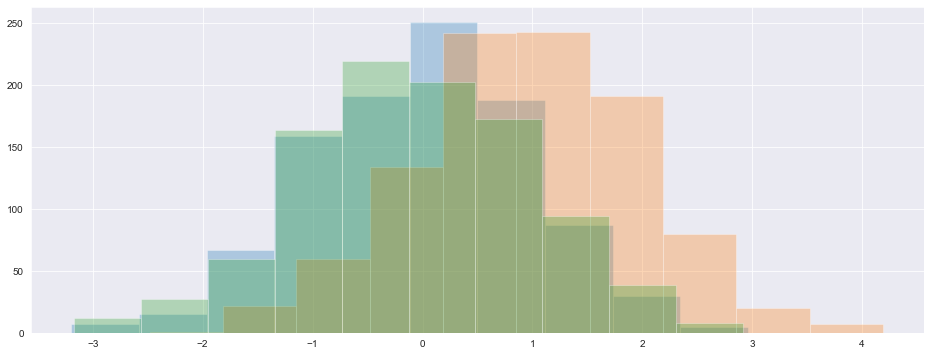

In [129]:
plt.hist(x1, alpha = 0.3)
plt.hist(x2, alpha = 0.3)
plt.hist(x3, alpha = 0.3)

In [126]:
stats.ttest_1samp(x3, 0)

Ttest_1sampResult(statistic=-1.6240940965920094, pvalue=0.1046711817017458)

In [127]:
stats.ttest_ind(x1, x3)

Ttest_indResult(statistic=0.9753812690218663, pvalue=0.3294892463626643)